## Centroid Models Assignment

In [5]:
# import pandas
import pandas as pd
# import Kmeans 
from sklearn.cluster import KMeans
# import LabelEncoder, StandardScaler 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
# import numpy
import numpy as np
# import seaborn
import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [29]:
# load dataframe
df = pd.read_csv('mall_customers.csv')

**Take some time to explore the dataframe above.**

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

----------------------
## Objective: 
#### 1. Fit K-Means, 
#### 2. Find the optimal number of clusters using the elbow rule and plot the clusters.


It may be difficult to visualize clusters on dataframes with many features. To simplify the task, we can plot the clusters in 2-D, by creating a clustering model on the last two columns of the dataset. 

> **Note:** There are ways to lower the dimension of your data so it can plotted in two dimensions and we will get to those in the beginning of next week.

We shouldn't forget to scale the data using some technique from sklearn, even though it's **not a must** in the case because we take only the last two columns, and they have already have similar scale.


In [30]:
# preprocess the data
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
scaler = StandardScaler()
df[['Age', 'Annual Income (k$)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)']])

In [31]:
# prepare predictors
X = df[['Gender', 'Age', 'Annual Income (k$)']]

- elbow rule

In [32]:
# fit KMeans and calculate sum of squared distances for a range of cluster numbers
ssd = []
range_n_clusters = list(range(1,11))
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)

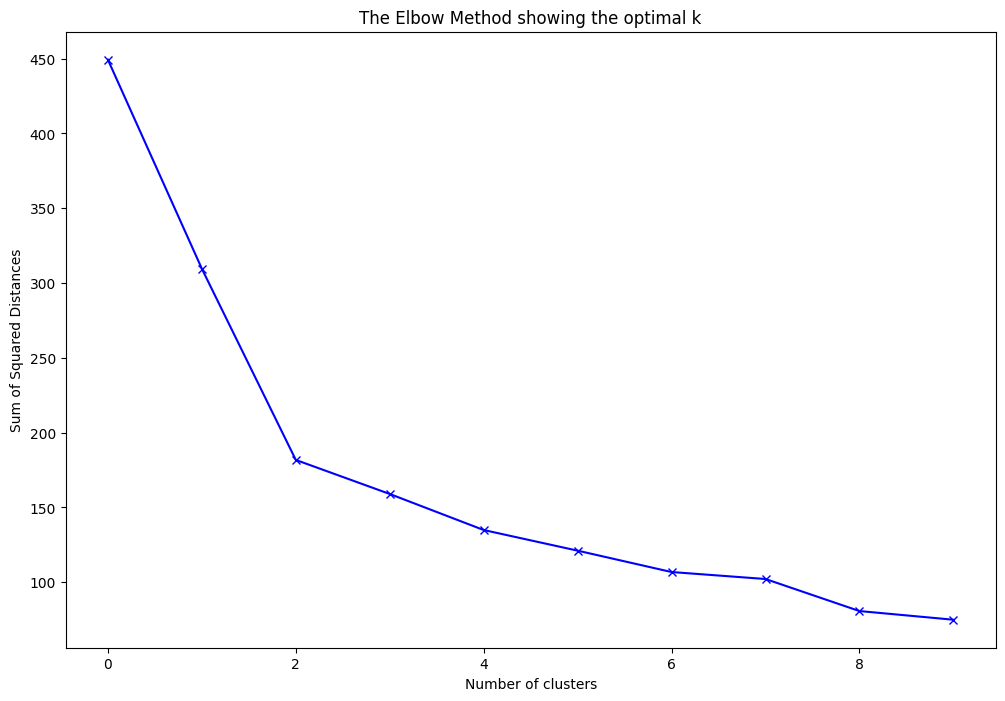

In [33]:
# plot the elbow curve
plt.figure(figsize=(12,8))
plt.plot(ssd, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

* fit model with optimal number of clusters

In [35]:
# fit KMeans with the optimal number of clusters (assuming it's 3 from the elbow plot)
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=2)

In [36]:
df['Cluster'] = kmeans.labels_

* define function plot_clusters

In [37]:
# Define a function to plot clusters
def plot_clusters(df):
    plt.figure(figsize=(12,8))
    sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df)
    plt.show()

* plot clusters

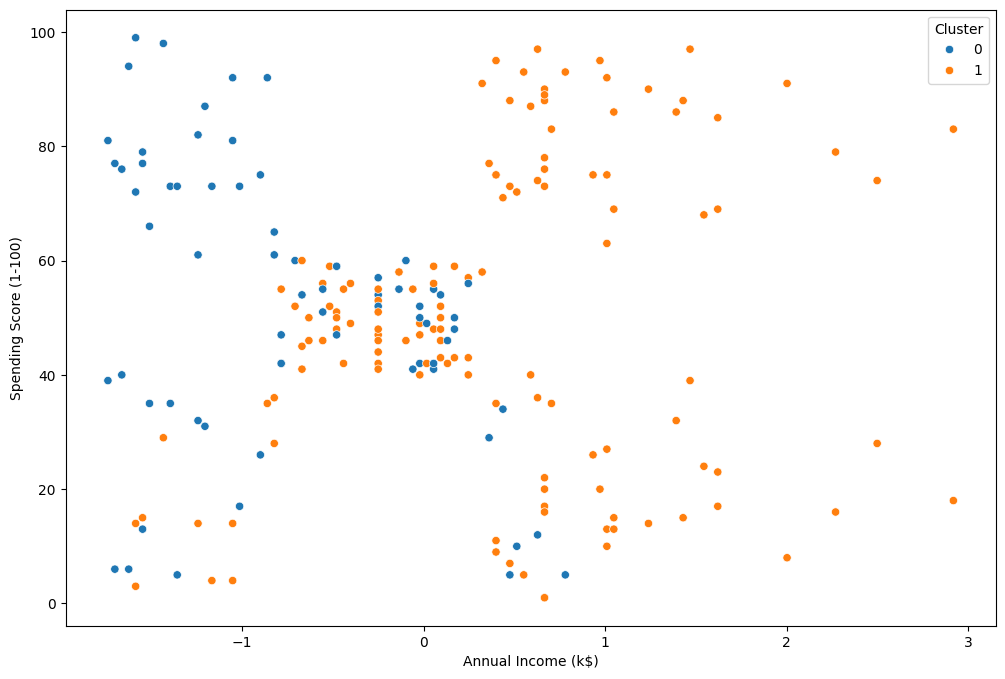

In [38]:
# Plot the clusters
plot_clusters(df)